# Grab Essentials

In [1]:
# pipelining tools
from fn_graph import Composer

# data manipuluation
import pandas as pd
import numpy as np

# ml
import sklearn as sk
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer

# graphing
import matplotlib.pyplot as plt

# set logger
import logging
logging.getLogger().setLevel(logging.INFO)

# Build ML Pipeline

INFO:root:Stage: Generate iris 
INFO:root:Stage: Parse Data
INFO:root:Stage: Run Data Diagnostics
INFO:root:(150, 5)
INFO:root:[dtype('float64') dtype('int64')]


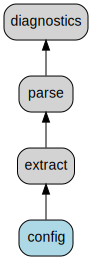

In [9]:
config = {'dataset':'iris'}

def extract(config):    
    dataset = config['dataset']
    logging.info(f'Stage: Generate {dataset} ')
    if dataset == 'iris':
        return load_iris()
    elif dataset == 'digits':
        return load_digits()
    elif dataset == 'wine':
        return load_wine()
    elif dataset == 'cancer':
        return load_breast_cancer()
    
def parse(extract):
    
    logging.info('Stage: Parse Data')
    
    return (
        pd.DataFrame(extract['data'], columns=extract['feature_names'])
        .assign(target = extract['target'])
    )
    
def diagnostics(parse):
    logging.info('Stage: Run Data Diagnostics')
    logging.info(parse.shape)
    logging.info(parse.dtypes.unique())

composer = Composer().update(extract,parse,diagnostics).update_parameters(config=config)

dot = composer.graphviz()

outputs = composer.calculate('diagnostics', intermediates = True)

dot